In [2]:
!pip install tensorflow
! pip install keras

In [40]:
import os
import math
import cv2 as cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import Sequence, to_categorical
#from keras import utils as np_utils

from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,TensorBoard, Callback
from keras.optimizers import Adam, Optimizer
import keras.backend as ks
from sklearn.utils import class_weight

from sklearn.model_selection import KFold, StratifiedKFold

import random

%matplotlib inline

In [4]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [5]:
print(tf.__version__)

2.15.0


In [6]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[26178  1198 48120 53245 50737 13650 21461 43445]


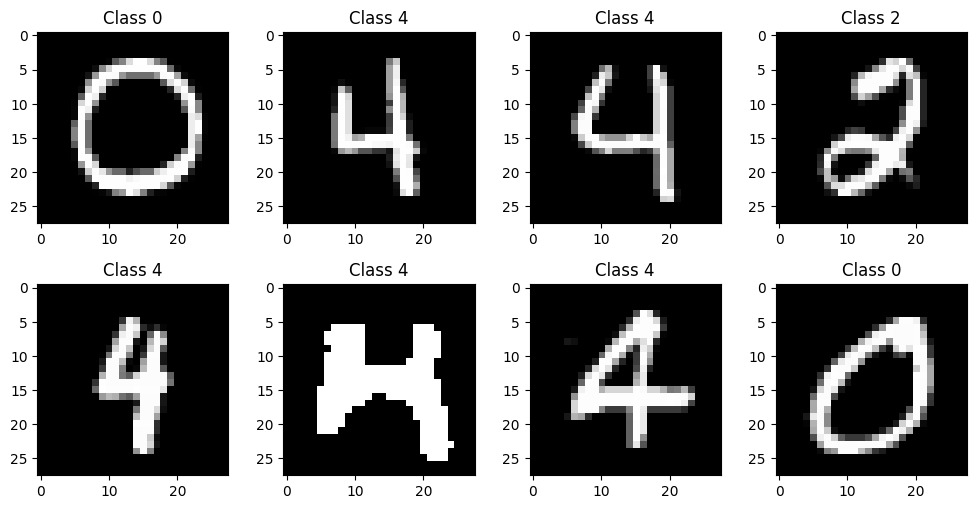

In [7]:
# show image of training data
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, x_train.shape[0], 8) # select 8 digits(0~9) randomly
print(rand_indexes)

for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(x_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
plt.tight_layout()

In [8]:
np.isnan(x_train).any()

False

In [9]:
np.isnan(x_test).any()

False

In [10]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [11]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


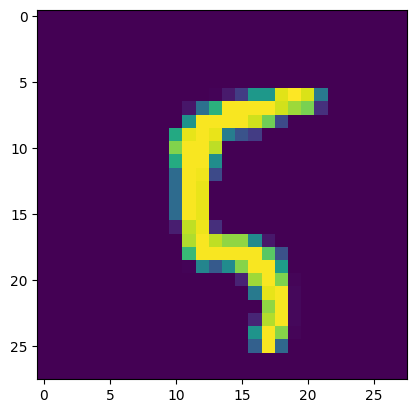

In [12]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [13]:
batch_size = 64
num_classes = 10
epochs = 5

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [16]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 29s 34ms/step - loss: 0.1383 - acc: 0.9570 - val_loss: 0.0477 - val_acc: 0.9852
Epoch 2/5
844/844 [==============================] - 27s 32ms/step - loss: 0.0392 - acc: 0.9882 - val_loss: 0.0324 - val_acc: 0.9898
Epoch 3/5
844/844 [==============================] - 29s 34ms/step - loss: 0.0285 - acc: 0.9913 - val_loss: 0.0338 - val_acc: 0.9907
Epoch 4/5
844/844 [==============================] - 29s 34ms/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0355 - val_acc: 0.9917
Epoch 5/5
844/844 [==============================] - 29s 35ms/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0345 - val_acc: 0.9922


In [17]:
#test model
preds = model.predict(x_test[0].reshape(-1,28,28,1))
print(int(np.argmax(preds)))

1/1 [==============================] - 0s 112ms/step
7


In [18]:
#Evaluate Model
score = model.evaluate(x_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0266 - acc: 0.9914
Test loss:  0.026599787175655365
Test accuracy:  0.9914000034332275


tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


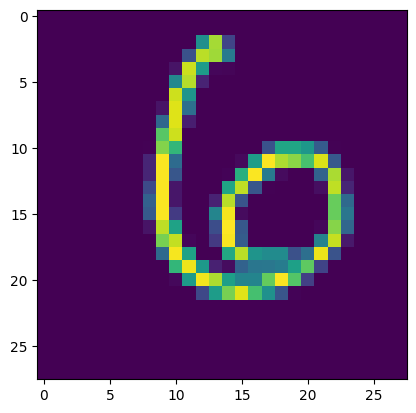

In [19]:
plt.imshow(x_test[100][:,:,0])
print(y_test[100])

In [20]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=2)
print("Test Accuracy: ", test_acc)
print("Test loss:", test_loss)

313/313 - 2s - loss: 0.0266 - acc: 0.9914 - 2s/epoch - 6ms/step
Test Accuracy:  0.9914000034332275
Test loss: 0.026599787175655365


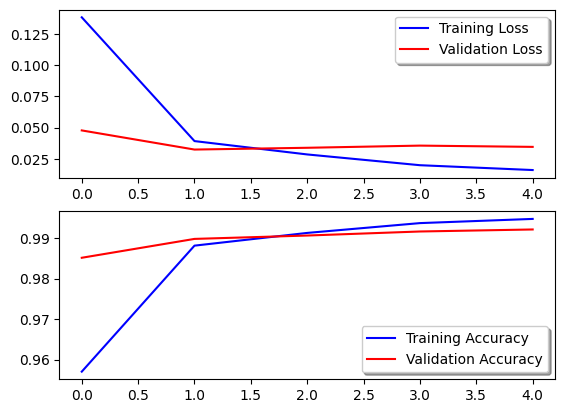

In [21]:
ig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [23]:
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),

    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')


model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [25]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - ETA: 0s - loss: 0.0128 - acc: 0.9965
Reached 99.5% accuracy so cancelling training!
844/844 [==============================] - 29s 34ms/step - loss: 0.0128 - acc: 0.9965 - val_loss: 0.0388 - val_acc: 0.9913


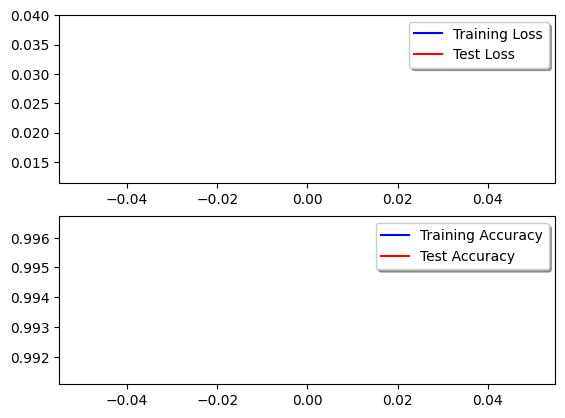

In [26]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Test Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Test Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0316 - acc: 0.9925


In [29]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

313/313 [==============================] - 2s 6ms/step


<Axes: >

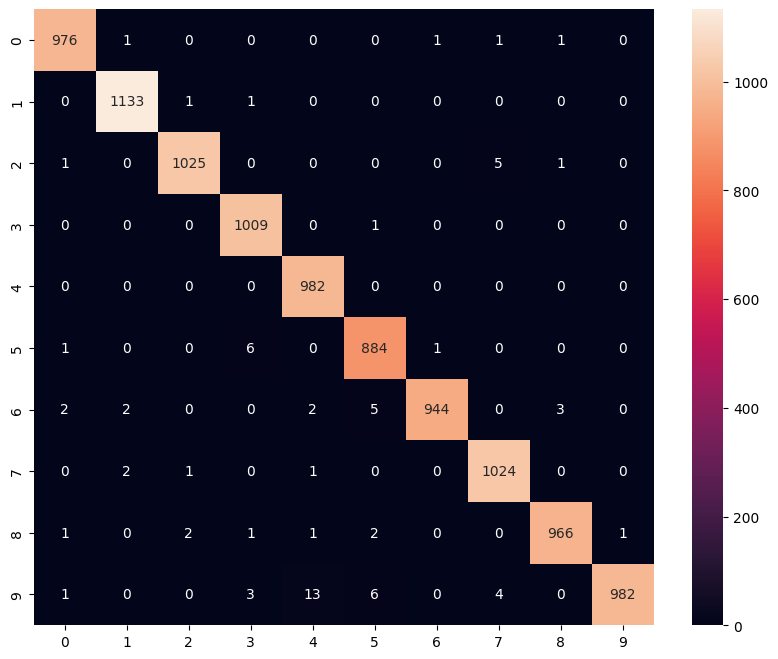

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [31]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.993
Loss: 0.032


In [32]:
# Show some wrong results, and the difference between the predicted label and the real labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

In [33]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

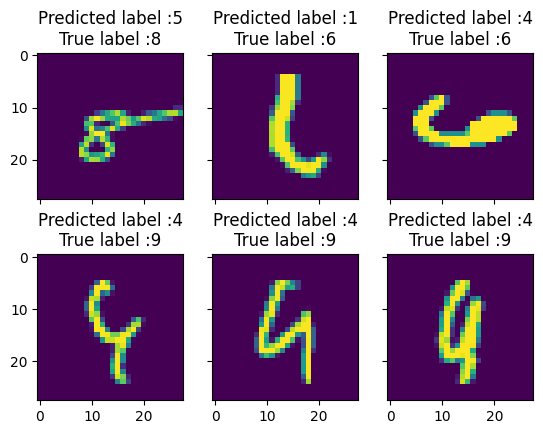

In [34]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [35]:
#get the predictions for the test data
Y_pred = model.predict(x_test)
#get the indices to be plotted
y_true = np.argmax(y_test,axis=1)

313/313 [==============================] - 2s 6ms/step


In [36]:
correct = np.nonzero(Y_pred_classes==y_true)[0]
misclassified = np.nonzero(Y_pred_classes!=y_true)[0]

In [37]:
print("Correct predicted classes:",correct.shape[0])
print("Misclassified predicted classes:",misclassified.shape[0])

Correct predicted classes: 9925
Misclassified predicted classes: 75


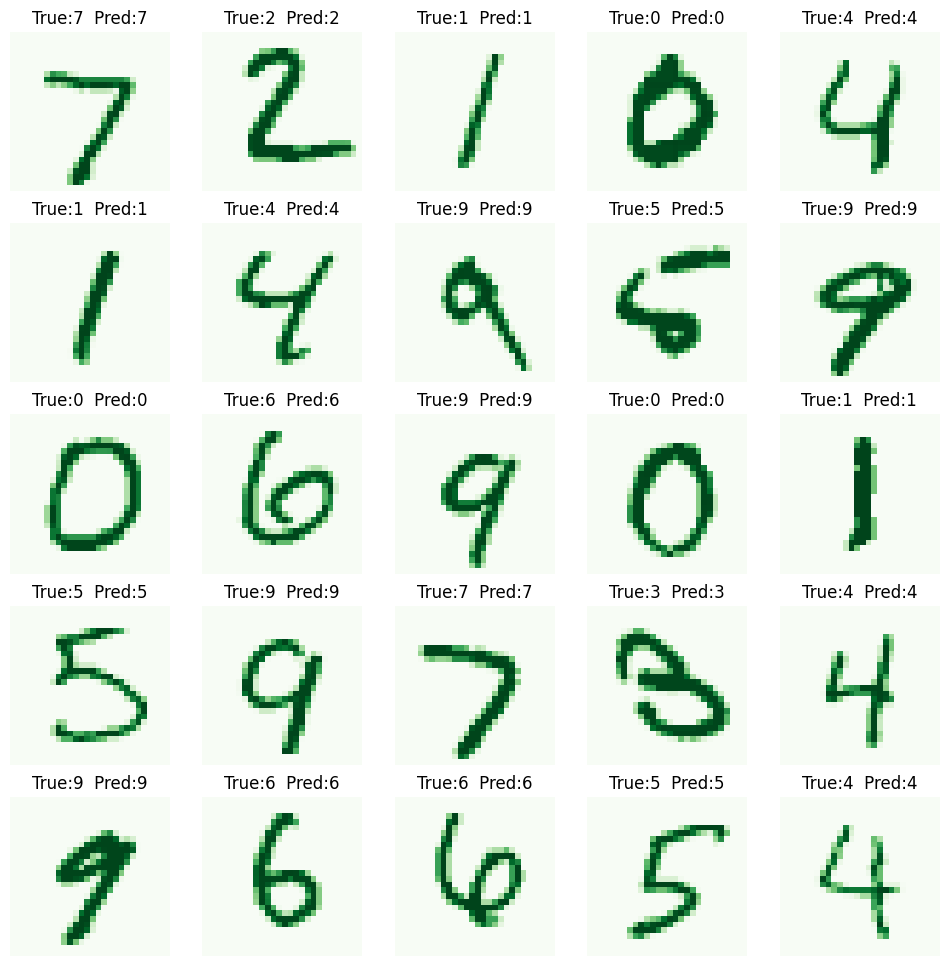

In [38]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,5, figsize=(12,12))

    for i, indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{}  Pred:{}".format(y_true[indx],Y_pred_classes[indx]))
    plt.show()

plot_images(correct, "Greens")

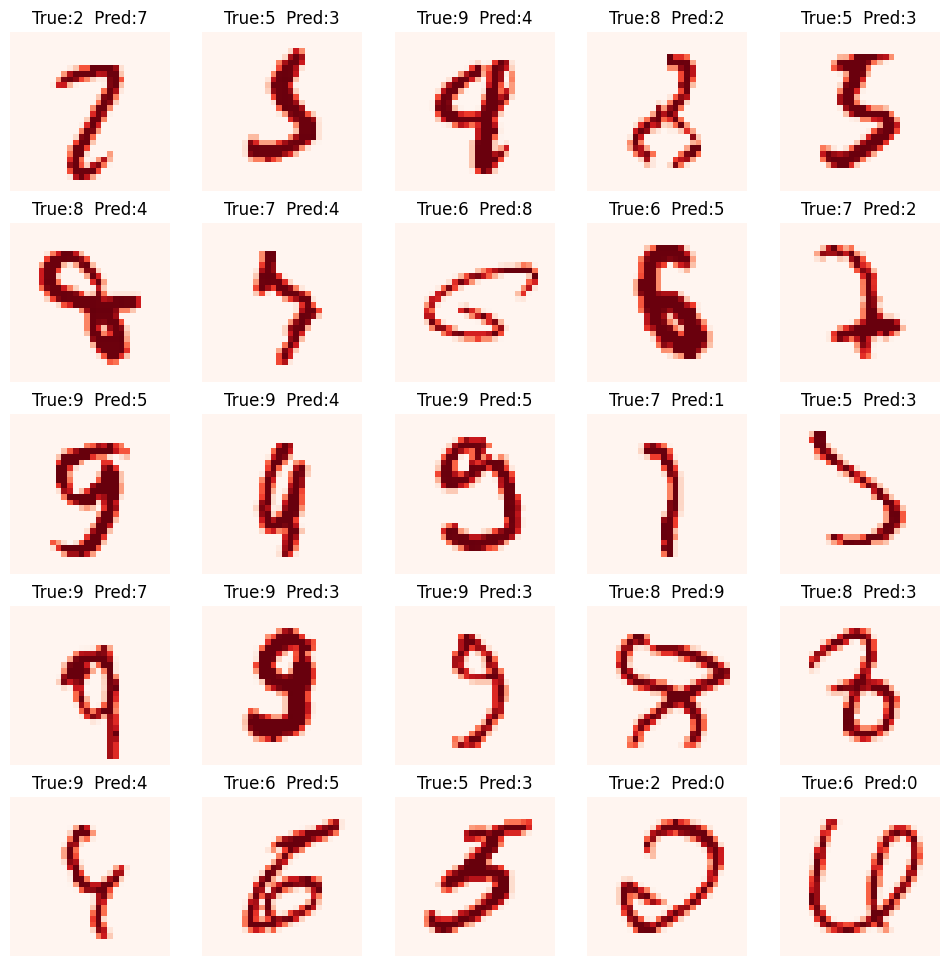

In [39]:
plot_images(misclassified, "Reds")